In [18]:
import numpy as np
import pandas as pd

In [19]:
data = pd.read_csv("boston.csv")
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
class LinearRegression:
    """使用python语言实现线性回归算法(梯度下降)"""
    def __init__(self, alpha, times):
        """初始化方法
        
        Parameters
        ----
        alpha : float
            学习率：用来控制步长 (权重调整的幅度)
        times : int
            循环迭代的次数
        """
        self.alpha = alpha
        self.times = times
    
    def fit(self, X, y):
        """
        根据提供的训练数据，对模型进行训练
        
        Parameters
        ----
        X : 类数组类型。形状：[样本数量，特征数量]
            待训练的样本特征属性 (特征矩阵)
            
        y : 类数组类型。形状：[样本数量]
            目标值(标签信息)
        """
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量 初始值为0（其它的也行），长度比特征数量多1 多出的那个就是截距
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表 用来保存每次迭代后的损失值 损失计算：求和[(预测值 - 初始值)**2] / 2
        self.loss_ = []
        
        # 进行循环 多次迭代 在每次迭代过程中 不断的去调整权重值 使得损失值不断减小
        for i in range(self.times):
            y_hat = np.dot(X, self.w_[1:]) + self.w_[0]
            # 计算真实值和预测值之间的差距
            error = y - y_hat
            self.loss_.append(np.sum(error**2) / 2)
            # 根据差距调整权重w_ 根据公式：调整为 权重[j] = 权重[j] + 学习率 * sum((y - y_hat) * x[j])
            self.w_[0] += self.alpha * np.sum(error)
            self.w_[1:] += self.alpha * np.dot(X.T, error)
    
    def predict(self, X):
        """根据参数传递的样本 对样本数据进行预测 
        
        Parameters
        ----
        X : 类数组类型。形状：[样本数量，特征数量]
            待训练的样本特征属性 (特征矩阵)
            
        returns
        ----
        result : 数组类型
                预测的结果
        """
        X = np.asarray(X)
        result = np.dot(X, self.w_[1:]) + self.w_[0]
        return result


In [21]:
lr = LinearRegression(alpha=0.001, times=20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]
lr.fit(train_X,train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)** 2))

1.1804176210461784e+210

In [22]:
class StandardScaler:
    """该类对数据进行标准化处理。"""
    def fit(self, X):
        """根据转递的样本计算每个特征列的均值与标准差
        
        Parameters
        ----
        X : 类数组类型
            训练数据， 用来计算均值和标准差
        """
        X = np.asarray(X)
        # 这里axis=0表示按照列计算标准差和均值
        self.std_ = np.std(X, axis=0)
        self.mean_ = np.mean(X, axis=0)
    def transform(self, X):
        """对给定的数据X进行标准化处理。将X的每一列都变成标准正态分布的数据
        Parameters
        ----
        X : 类数组类型
            待转换数据。
        
        Returns
        ----
        result : 类数组类型
                参数X转换成标准正态分布后的结果
        """
        return (X - self.mean_) / self.std_
    def fit_transform(self, X):
        """对数据进行训练并转换，返回转换之后的结果
        Parameters
        ----
        X : 类数组类型
            待转换数据。
        
        Returns
        ----
        result : 类数组类型
                参数X转换成标准正态分布后的结果
        """
        self.fit(X)
        return self.transform(X)

In [23]:
# 为了避免每个特征数量级的不同，从而在梯度下降的过程中带来影响
# 我们现在考虑对每个特征进行标准化处理
lr = LinearRegression(alpha=0.0005, times=20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

# 标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
# 注意！！ 这里不是fit_transform 模型本不应该知道测试集的任何信息，
# 如果你在预处理阶段就用了测试集的信息去“调整标准化的方式”，相当于模型提前偷看了答案的一部分。
# 这里强调 一样的处理！！
test_X = s.transform(test_X)
s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2))

0.20343617342159606

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

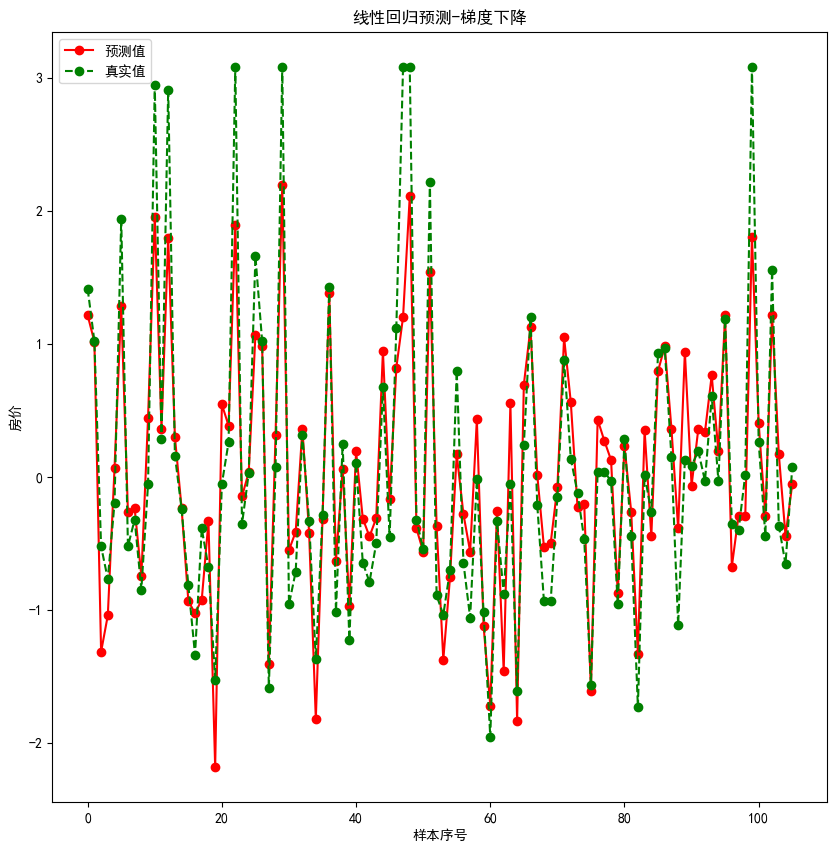

In [25]:
plt.figure(figsize=(10, 10))
# 绘制预测值
plt.plot(result, "ro-", label="预测值")
# 绘制真实值 在 plt.plot() 里使用 .values 是为了把 pandas.Series 或 DataFrame 转换为 NumPy 数组
plt.plot(test_y.values, "go--", label="真实值")
plt.title("线性回归预测-梯度下降")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

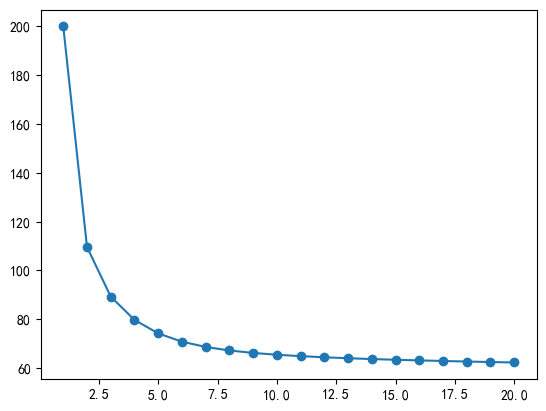

In [26]:
# 绘制累计误差值
plt.plot(range(1, lr.times + 1), lr.loss_, "o-")

In [27]:
# 因为房价分析涉及多个维度 不方便进行可视化展示， 为了实现可视化
# 我们只选取期中的一个维度(RM) ,并画出直线，实现拟合
lr = LinearRegression(alpha=0.0005, times=50)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, 6:7]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, 6:7]
test_y = t.iloc[400:, -1]
# 对数据进行标准化处理

s3 = StandardScaler()
train_X = s3.fit_transform(train_X)
test_X = s3.transform(test_X)

s4 = StandardScaler()
train_y = s4.fit_transform(train_y)
test_y = s4.transform(test_y)

lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2))

0.4607175893716215

array([-2.77333712e-16,  6.54984608e-01])

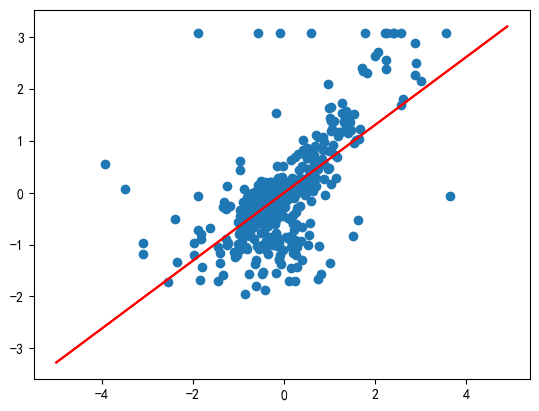

In [ ]:
plt.scatter(train_X["rm"], train_y)
# 查看方程系数 权重w_
display(lr.w_)
# 开始构建方程 y = -2.77333712e-16 + 6.54984608e-01 * x
x = np.arange(-5, 5, 0.1)
y = -2.77333712e-16 + 6.54984608e-01 * x
plt.plot(x, y, "r")
# 也可以这样 两个图都是一样的
plt.plot(x, lr.predict(x.reshape(-1, 1)), "r")